In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("./SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [4]:
df_raw.describe()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.527778,1149.666667,78.802778,300.563889,1149.666667,933.920833,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,37.660799,17.571788,36.421004,45.390303,17.571788,107.863887,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1113.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1132.000000,889.750000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1155.000000,951.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,1164.000000,994.250000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1185.000000,1078.000000,10.000000


In [178]:
# 결측치 확인: pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

PLATE_NO             Plate No
ROLLING_DATE         작업시간
SCALE                Scale 분량
SPEC                 제품 규격 // 66개
STEEL_KIND           강종 // 9가지 종류
PT_THK               Plate 두께 // 152
PT_WDTH              Plate 폭 // 343
PT_LTH               Plate 길이 // 505
PT_WGT               Plate 중량 // 433
FUR_NO               가열로 호기 // 3호기
FUR_NO_ROW           가열로 작업 순번 // 2가지 종류 (1,2)
FUR_HZ_TEMP          가열로 가열대 온도 // 100
FUR_HZ_TIME          가열로 가열대 시간 // 135
FUR_SZ_TEMP          가열로 균열대 온도 // 70
FUR_SZ_TIME          가열로 균열대 시간 // 131
FUR_TIME             가열로 시간 // 153
FUR_EXTEMP           추출온도 // 70
ROLLING_TEMP_T5      압연 온도 //226
HSB                  HSB 적용 (1-적용, 0-미적용)
ROLLING_DESCALING    압연 중 Descaling 횟수 (6가지: 8,  5,  6, 10,  9,  7])
WORK_GR              작업조 (4개)

In [49]:
df_raw["WORK_GR"].unique()

array(['2조', '3조', '1조', '4조'], dtype=object)

In [206]:
len(df_raw["SPEC"].unique())

66

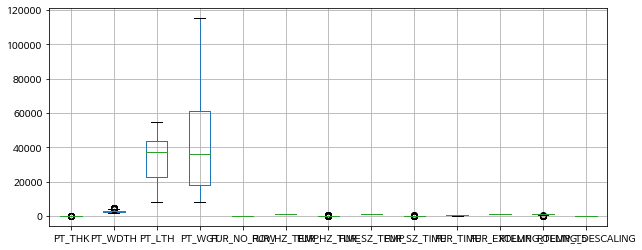

In [51]:
# boxploat: 상자수염도, figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize = (10, 4))

In [52]:
freature_names = df_raw.columns

In [53]:
freature_names

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK',
       'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

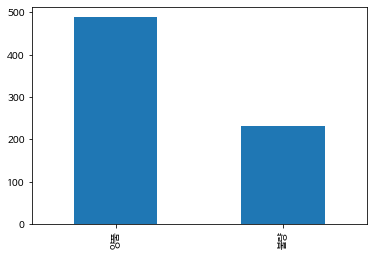

In [75]:
 df_raw["SCALE"].value_counts().plot.bar()

<function matplotlib.pyplot.show(*args, **kw)>

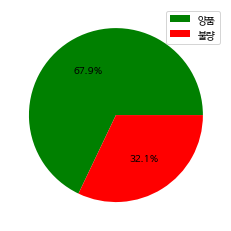

In [105]:
df_count =  df_raw["SCALE"].value_counts()
labels= ["양품", "불량"]
plt.pie(df_count, colors = ["green", "red"], autopct='%1.1f%%')
plt.legend(labels)
plt.show

In [106]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
PT_THK,1.000,-0.313,-0.863,-0.397,-0.003,-0.524,0.160,-0.695,0.113,0.413,-0.695,-0.374,-0.837
PT_WDTH,-0.313,1.000,0.120,0.031,0.007,0.180,-0.119,0.227,0.023,-0.393,0.227,-0.022,0.338
PT_LTH,-0.863,0.120,1.000,0.452,-0.021,0.473,-0.077,0.645,-0.070,-0.252,0.645,0.313,0.809
PT_WGT,-0.397,0.031,0.452,1.000,-0.022,0.153,0.010,0.360,-0.191,-0.058,0.360,0.263,0.239
FUR_NO_ROW,-0.003,0.007,-0.021,-0.022,1.000,0.005,-0.016,0.009,0.049,0.016,0.009,-0.004,0.018
FUR_HZ_TEMP,-0.524,0.180,0.473,0.153,0.005,1.000,-0.114,0.773,-0.222,-0.348,0.773,0.265,0.471
FUR_HZ_TIME,0.160,-0.119,-0.077,0.010,-0.016,-0.114,1.000,-0.203,0.178,0.473,-0.203,0.012,-0.138
FUR_SZ_TEMP,-0.695,0.227,0.645,0.360,0.009,0.773,-0.203,1.000,-0.451,-0.477,1.000,0.452,0.649
FUR_SZ_TIME,0.113,0.023,-0.070,-0.191,0.049,-0.222,0.178,-0.451,1.000,0.443,-0.451,-0.207,-0.106
FUR_TIME,0.413,-0.393,-0.252,-0.058,0.016,-0.348,0.473,-0.477,0.443,1.000,-0.477,-0.199,-0.367


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


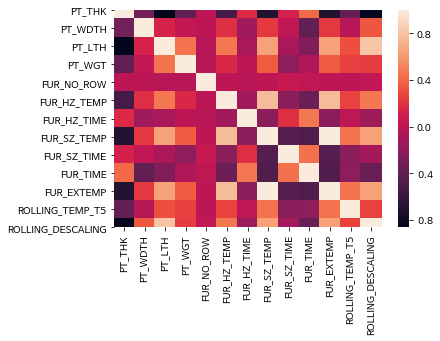

In [109]:
sns.heatmap(df_raw.corr(method = "pearson").round(3))

In [110]:
freature_names

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK',
       'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

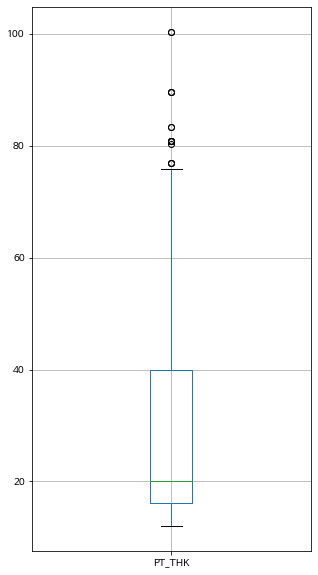

In [116]:
df_raw_M = df_raw[["PT_THK"]]
df_raw_M.boxplot(figsize = (5, 10))

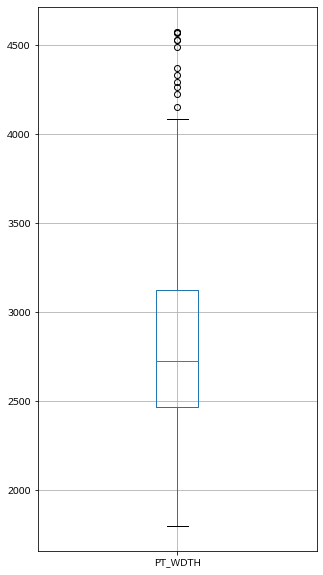

In [117]:
df_raw_M = df_raw[["PT_WDTH"]]
df_raw_M.boxplot(figsize = (5, 10))

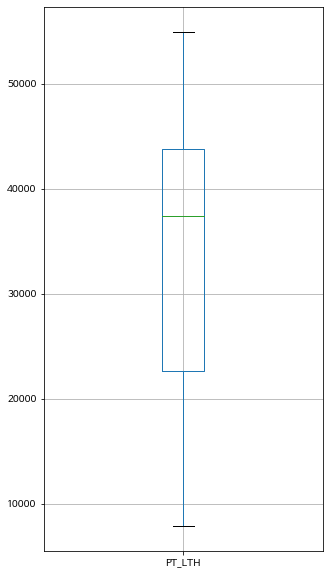

In [120]:
df_raw_M = df_raw[["PT_LTH"]]
df_raw_M.boxplot(figsize = (5, 10))

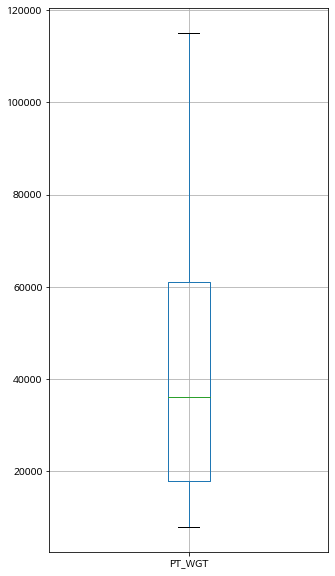

In [121]:
df_raw_M = df_raw[["PT_WGT"]]
df_raw_M.boxplot(figsize = (5, 10))

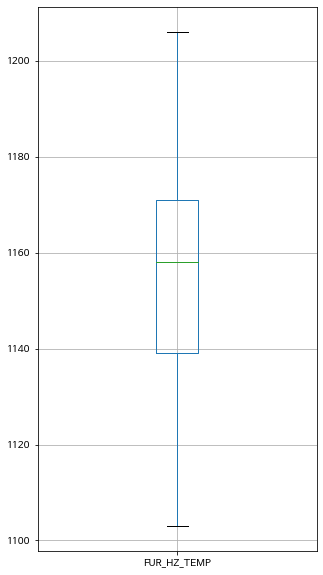

In [123]:
df_raw_M = df_raw[["FUR_HZ_TEMP"]]
df_raw_M.boxplot(figsize = (5, 10))

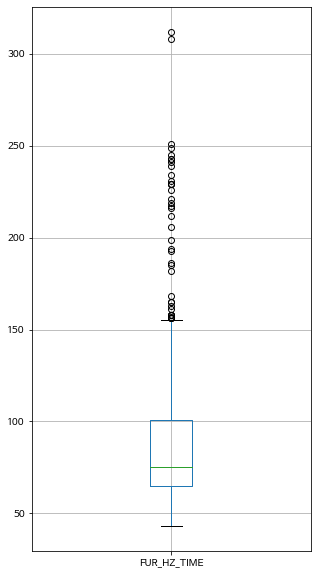

In [124]:
df_raw_M = df_raw[["FUR_HZ_TIME"]]
df_raw_M.boxplot(figsize = (5, 10))

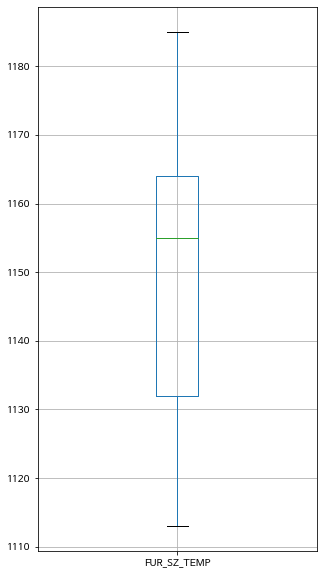

In [125]:
df_raw_M = df_raw[["FUR_SZ_TEMP"]]
df_raw_M.boxplot(figsize = (5, 10))

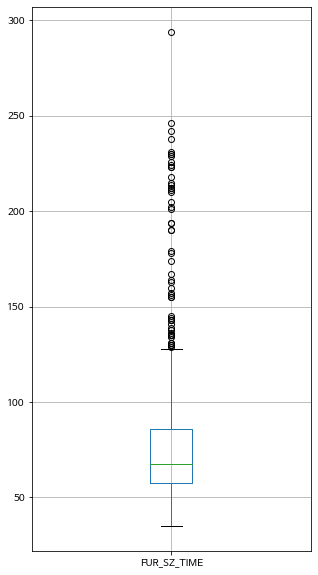

In [126]:
df_raw_M = df_raw[["FUR_SZ_TIME"]]
df_raw_M.boxplot(figsize = (5, 10))

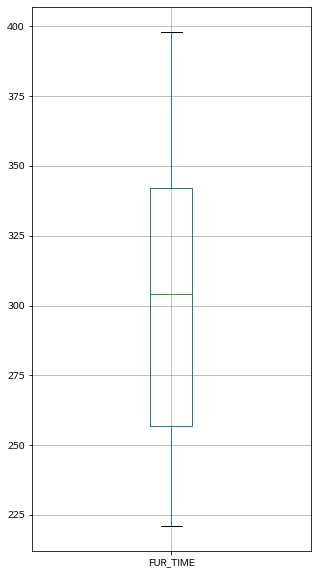

In [127]:
df_raw_M = df_raw[["FUR_TIME"]]
df_raw_M.boxplot(figsize = (5, 10))

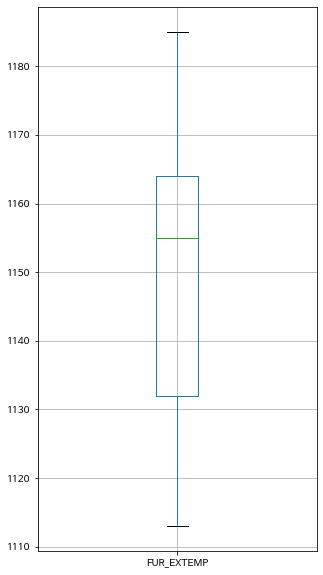

In [128]:
df_raw_M = df_raw[["FUR_EXTEMP"]]
df_raw_M.boxplot(figsize = (5, 10))

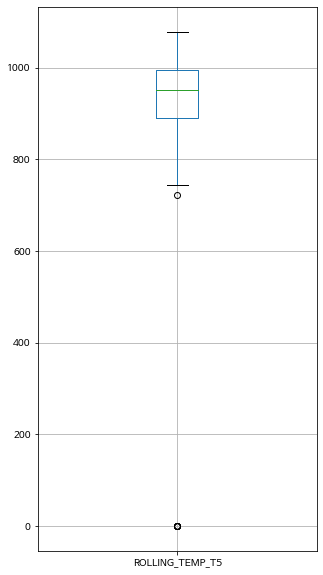

In [129]:
df_raw_M = df_raw[["ROLLING_TEMP_T5"]]
df_raw_M.boxplot(figsize = (5, 10))

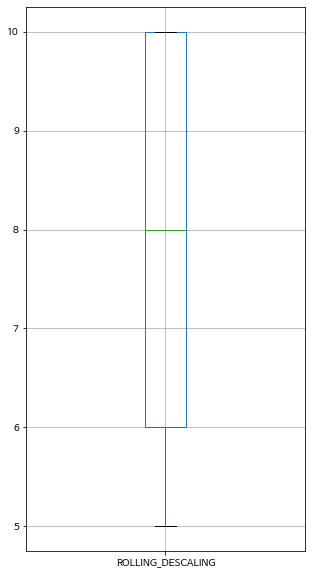

In [131]:
df_raw_M = df_raw[["ROLLING_DESCALING"]]
df_raw_M.boxplot(figsize = (5, 10))

In [133]:
df_raw[df_raw["ROLLING_TEMP_T5"]==0]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,PB562815,2008-08-01:02:23:09,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1128,0,적용,6,1조
184,PB562958,2008-08-01:10:00:06,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1169,64,1164,61,308,1164,0,적용,10,3조
185,PB562959,2008-08-01:09:94:29,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1163,57,1166,67,303,1166,0,적용,10,4조
494,PB563268,2008-08-02:01:10:40,양품,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,...,1133,89,1122,59,378,1122,0,적용,6,2조
495,PB563269,2008-08-02:01:10:36,양품,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,...,1130,92,1124,61,362,1124,0,적용,6,3조
496,PB563270,2008-08-02:01:10:23,양품,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,...,1119,109,1117,76,383,1117,0,적용,6,3조


In [135]:
df_raw[df_raw["ROLLING_TEMP_T5"]< 770]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,PB562815,2008-08-01:02:23:09,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1128,0,적용,6,1조
77,PB562851,2008-08-01:04:43:30,양품,COMMON,T8,75.71,2725,9749,15790,3호기,...,1123,79,1126,61,291,1126,760,적용,6,1조
184,PB562958,2008-08-01:10:00:06,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1169,64,1164,61,308,1164,0,적용,10,3조
185,PB562959,2008-08-01:09:94:29,양품,JS-SM490YB,C0,16.09,2221,43596,61150,3호기,...,1163,57,1166,67,303,1166,0,적용,10,4조
448,PB563222,2008-08-01:22:21:01,양품,GL-A36-TM,T7,40.35,2511,22669,36060,1호기,...,1178,90,1127,138,333,1127,745,적용,6,3조
494,PB563268,2008-08-02:01:10:40,양품,PILAC-BT33,T5,80.82,2085,12919,17090,2호기,...,1133,89,1122,59,378,1122,0,적용,6,2조
495,PB563269,2008-08-02:01:10:36,양품,PILAC-BT33,T5,80.82,2085,13176,17430,1호기,...,1130,92,1124,61,362,1124,0,적용,6,3조
496,PB563270,2008-08-02:01:10:23,양품,NV-D32-TM,T0,40.35,2497,23592,37320,3호기,...,1119,109,1117,76,383,1117,0,적용,6,3조
519,PB563293,2008-08-02:03:33:46,양품,NV-A,C0,13.06,3445,53682,18960,2호기,...,1147,73,1129,164,342,1129,723,적용,10,3조


In [140]:
np.median(df_raw["ROLLING_TEMP_T5"])

951.0

In [142]:
df_raw[df_raw["ROLLING_TEMP_T5"]==0]["ROLLING_TEMP_T5"] = np.median(df_raw["ROLLING_TEMP_T5"])

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [145]:
df_raw[df_raw["PLATE_NO"] == "PB562815"]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,PB562815,2008-08-01:02:23:09,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1128,0,적용,6,1조


In [179]:
df_raw.loc[39:44]

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
39,PB562813,2008-08-01:02:22:16,양품,AB/EH36-TM,T8,51.27,3060,12407,15280,2호기,...,1133,93,1127,75,330,1127,860,적용,6,3조
40,PB562814,2008-08-01:02:22:18,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1126,62,1125,106,340,1125,863,적용,6,3조
41,PB562815,2008-08-01:02:23:09,양품,GL-E36-TM,T8,55.51,3765,11398,37400,3호기,...,1132,95,1128,80,341,1128,,적용,6,1조
42,PB562816,2008-08-01:02:23:26,양품,BV-EH36-TM,T8,55.50,3302,11017,31700,1호기,...,1137,89,1131,83,341,1131,864,적용,6,4조
43,PB562817,2008-08-01:02:23:09,양품,COMMON,T8,55.50,3302,11017,15850,1호기,...,1127,72,1128,100,339,1128,845,적용,6,3조
44,PB562818,2008-08-01:02:24:27,양품,KS-HSB600,T5,40.00,3990,13896,34820,2호기,...,1112,77,1124,97,359,1124,808,적용,6,1조


In [201]:
  0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      6
HSB                  0# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("./SCALE불량.csv", encoding='euc-kr')
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [202]:
df_raw["ROLLING_TEMP_T5"] = np.where( df_raw["ROLLING_TEMP_T5"]==0, None , df_raw["ROLLING_TEMP_T5"])

In [203]:
# 결측치 확인: pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      6
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [204]:
df_raw.fillna(method = 'bfill', inplace= True)

In [205]:
# 결측치 확인: pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_raw.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [211]:
df_raw["SCALE"]  = np.where(df_raw["SCALE"] =="양품", 0, 1)

In [214]:
df_raw["HSB"]  = np.where(df_raw["HSB"] =="적용", 1, 0)

In [241]:
for i in range(len(df_raw["FUR_NO"])):
    df_raw["FUR_NO"].iloc[i] = df_raw["FUR_NO"].iloc[i][0]
    df_raw["WORK_GR"].iloc[i] = df_raw["FUR_NO"].iloc[i][0]

In [244]:
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1,...,1144,116,1133,59,282,1133,934,1,8,1
1,PB562775,2008-08-01:00:00:16,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1,...,1144,122,1135,53,283,1135,937,1,8,1
2,PB562776,2008-08-01:00:00:59,0,NV-E36-TM,T8,33.27,3619,19181,18130,2,...,1129,116,1121,55,282,1121,889,1,8,2
3,PB562777,2008-08-01:00:01:24,0,NV-E36-TM,T8,33.27,3619,19181,18130,2,...,1152,125,1127,68,316,1127,885,1,8,2
4,PB562778,2008-08-01:00:01:44,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3,...,1140,134,1128,48,314,1128,873,1,8,3


In [18]:
df_raw

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,PB563502,13:35:36,불량,NK-KA,C0,20.14,3580,38639,21870,3호기,...,1172,72,1164,62,245,1164,1005,적용,8,2조
716,PB563503,13:35:02,양품,NV-A32,C0,15.08,3212,48233,18340,2호기,...,1150,61,1169,61,238,1169,947,적용,10,1조
717,PB563504,14:40:00,양품,NV-A32,C0,16.60,3441,43688,19590,2호기,...,1169,65,1163,77,247,1163,948,적용,10,4조
718,PB563505,13:35:19,양품,LR-A,C0,15.59,3363,48740,80240,3호기,...,1179,86,1163,45,243,1163,940,적용,10,2조


In [17]:
# df_raw["time"] =[]
for i in range(len(df_raw["ROLLING_DATE"])):
    s = df_raw["ROLLING_DATE"][i]
    df_raw["ROLLING_DATE"].iloc[i] = s[11:]

/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [8]:
s = df_raw["ROLLING_DATE"][1]

In [10]:
s

'2008-08-01:00:00:16'

In [14]:
s[11:]

'00:00:16'